In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='AppleGothic')

In [3]:
df = pd.read_excel('./rawdata/metro_data_restart.xlsx')
df.head(2)

,사용월,호선명,지하철역,행정구역,대합실면적,승강장면적,월일수,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202111,우이신설선,4.19민주묘지,강북구,NaN,NaN,30,2,0,1231,...,2179,0,28,0,0,0,0,0,0,20211203
1,202112,우이신설선,4.19민주묘지,강북구,NaN,NaN,31,0,1,1048,...,1720,0,0,0,0,0,0,0,0,20220103


In [4]:
# 시간대별 체류인원 (승차인원 + 하차인원) 컬럼 생성

for col in df.columns :
    if '승차인원' in col :
        exit_col = col.replace('승차인원', '하차인원')
        if exit_col in df.columns :
            stay_col = col.replace('승차인원', '체류인원')
            df[stay_col] = df[col] + df[exit_col]

df.head(2)

,사용월,호선명,지하철역,행정구역,대합실면적,승강장면적,월일수,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,...,18시-19시 체류인원,19시-20시 체류인원,20시-21시 체류인원,21시-22시 체류인원,22시-23시 체류인원,23시-24시 체류인원,00시-01시 체류인원,01시-02시 체류인원,02시-03시 체류인원,03시-04시 체류인원
0,202111,우이신설선,4.19민주묘지,강북구,NaN,NaN,30,2,0,1231,...,11217,9453,5773,4917,4159,2485,28,0,0,0
1,202112,우이신설선,4.19민주묘지,강북구,NaN,NaN,31,0,1,1048,...,10614,8862,5897,5278,3839,1983,0,0,0,0


In [ ]:
# 시간대별 일평균 인원 ( 체류인원 / 월일수 ) 컬럼 생성

stay_columns = [col for col in df.columns if '체류인원' in col]

for col in stay_columns :
    new_col = col.replace('체류인원', '일평균')
    df[new_col] = round(df[col] / df['월일수'], 2)

df.head(2)

,사용월,호선명,지하철역,행정구역,대합실면적,승강장면적,월일수,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,...,18시-19시 일평균,19시-20시 일평균,20시-21시 일평균,21시-22시 일평균,22시-23시 일평균,23시-24시 일평균,00시-01시 일평균,01시-02시 일평균,02시-03시 일평균,03시-04시 일평균
0,202111,우이신설선,4.19민주묘지,강북구,NaN,NaN,30,2,0,1231,...,373.90,315.10,192.43,163.90,138.63,82.83,0.93,0.0,0.0,0.0
1,202112,우이신설선,4.19민주묘지,강북구,NaN,NaN,31,0,1,1048,...,342.39,285.87,190.23,170.26,123.84,63.97,0.00,0.0,0.0,0.0


In [ ]:
# 시간대별 혼잡도 컬럼 생성
con_columns = [ col for col in df.columns if '일평균' in col ]

for col in con_columns :
    congestion_col = col.replace('일평균', '혼잡도')
    df[congestion_col] = round( ((df[col] / df['승강장면적']) / 4.3 ) * 100, 2)

df.head(2)

,사용월,호선명,지하철역,행정구역,대합실면적,승강장면적,월일수,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,...,18시-19시 혼잡도,19시-20시 혼잡도,20시-21시 혼잡도,21시-22시 혼잡도,22시-23시 혼잡도,23시-24시 혼잡도,00시-01시 혼잡도,01시-02시 혼잡도,02시-03시 혼잡도,03시-04시 혼잡도
0,202111,우이신설선,4.19민주묘지,강북구,NaN,NaN,30,2,0,1231,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,202112,우이신설선,4.19민주묘지,강북구,NaN,NaN,31,0,1,1048,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 결측값 제거 >> 1~8호선 생존
filter_df = df.dropna()
filter_df.head(2)

,사용월,호선명,지하철역,행정구역,대합실면적,승강장면적,월일수,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,...,18시-19시 혼잡도,19시-20시 혼잡도,20시-21시 혼잡도,21시-22시 혼잡도,22시-23시 혼잡도,23시-24시 혼잡도,00시-01시 혼잡도,01시-02시 혼잡도,02시-03시 혼잡도,03시-04시 혼잡도
36,202111,3호선,가락시장,송파구,12557.98,3508.0,30,29,5,2518,...,11.37,6.12,4.22,3.69,3.02,1.27,0.32,0.0,0.0,0.0
37,202111,8호선,가락시장,송파구,5110.63,2617.5,30,41,1,2505,...,14.51,7.47,5.45,5.22,4.18,1.95,0.63,0.0,0.0,0.0


In [10]:
filter_df['호선명'].unique()

array(['3호선', '8호선', '7호선', '2호선', '5호선', '6호선', '4호선', '1호선'],
      dtype=object)

### 지하철 노선별 총 체류인원 분포

In [11]:
# 노선별 혼잡도 평균

line_avg_stay = filter_df.groupby('호선명').mean(numeric_only=True).reset_index()

stay_avg = line_avg_stay[['호선명'] + [col for col in filter_df.columns if '혼잡도' in col]]

stay_avg.head(3)

,호선명,04시-05시 혼잡도,05시-06시 혼잡도,06시-07시 혼잡도,07시-08시 혼잡도,08시-09시 혼잡도,09시-10시 혼잡도,10시-11시 혼잡도,11시-12시 혼잡도,12시-13시 혼잡도,...,18시-19시 혼잡도,19시-20시 혼잡도,20시-21시 혼잡도,21시-22시 혼잡도,22시-23시 혼잡도,23시-24시 혼잡도,00시-01시 혼잡도,01시-02시 혼잡도,02시-03시 혼잡도,03시-04시 혼잡도
0,1호선,0.128444,2.938639,7.732389,18.02100,36.678944,25.798472,20.222750,22.703639,24.643333,...,38.991194,21.008111,15.295944,14.559639,10.244528,4.883278,0.731583,0.027667,0.000583,0.000000
1,2호선,0.097500,4.005644,10.958889,27.90024,54.473516,38.731761,24.401913,22.573699,24.375530,...,58.864867,36.607443,26.102670,25.322563,21.298346,11.062348,2.398207,0.104306,0.001812,0.000177
2,3호선,0.024216,2.074060,7.585515,18.54692,30.051569,21.365351,15.490114,14.695147,15.296119,...,31.969240,19.748799,13.743276,12.312377,9.834093,4.582900,0.959093,0.025237,0.000441,0.000082


In [12]:
# 호선명을 인덱스로 설정하고 이름 바꾸기

line_avg = line_avg_stay[['호선명'] + [col for col in filter_df.columns if '혼잡도' in col]].set_index('호선명')
line_avg.index.name = 'line'

line_avg.head(3)

,04시-05시 혼잡도,05시-06시 혼잡도,06시-07시 혼잡도,07시-08시 혼잡도,08시-09시 혼잡도,09시-10시 혼잡도,10시-11시 혼잡도,11시-12시 혼잡도,12시-13시 혼잡도,13시-14시 혼잡도,...,18시-19시 혼잡도,19시-20시 혼잡도,20시-21시 혼잡도,21시-22시 혼잡도,22시-23시 혼잡도,23시-24시 혼잡도,00시-01시 혼잡도,01시-02시 혼잡도,02시-03시 혼잡도,03시-04시 혼잡도
line,,,,,,,,,,,,,,,,,,,,,
1호선,0.128444,2.938639,7.732389,18.02100,36.678944,25.798472,20.222750,22.703639,24.643333,25.617750,...,38.991194,21.008111,15.295944,14.559639,10.244528,4.883278,0.731583,0.027667,0.000583,0.000000
2호선,0.097500,4.005644,10.958889,27.90024,54.473516,38.731761,24.401913,22.573699,24.375530,26.368801,...,58.864867,36.607443,26.102670,25.322563,21.298346,11.062348,2.398207,0.104306,0.001812,0.000177
3호선,0.024216,2.074060,7.585515,18.54692,30.051569,21.365351,15.490114,14.695147,15.296119,16.061609,...,31.969240,19.748799,13.743276,12.312377,9.834093,4.582900,0.959093,0.025237,0.000441,0.000082


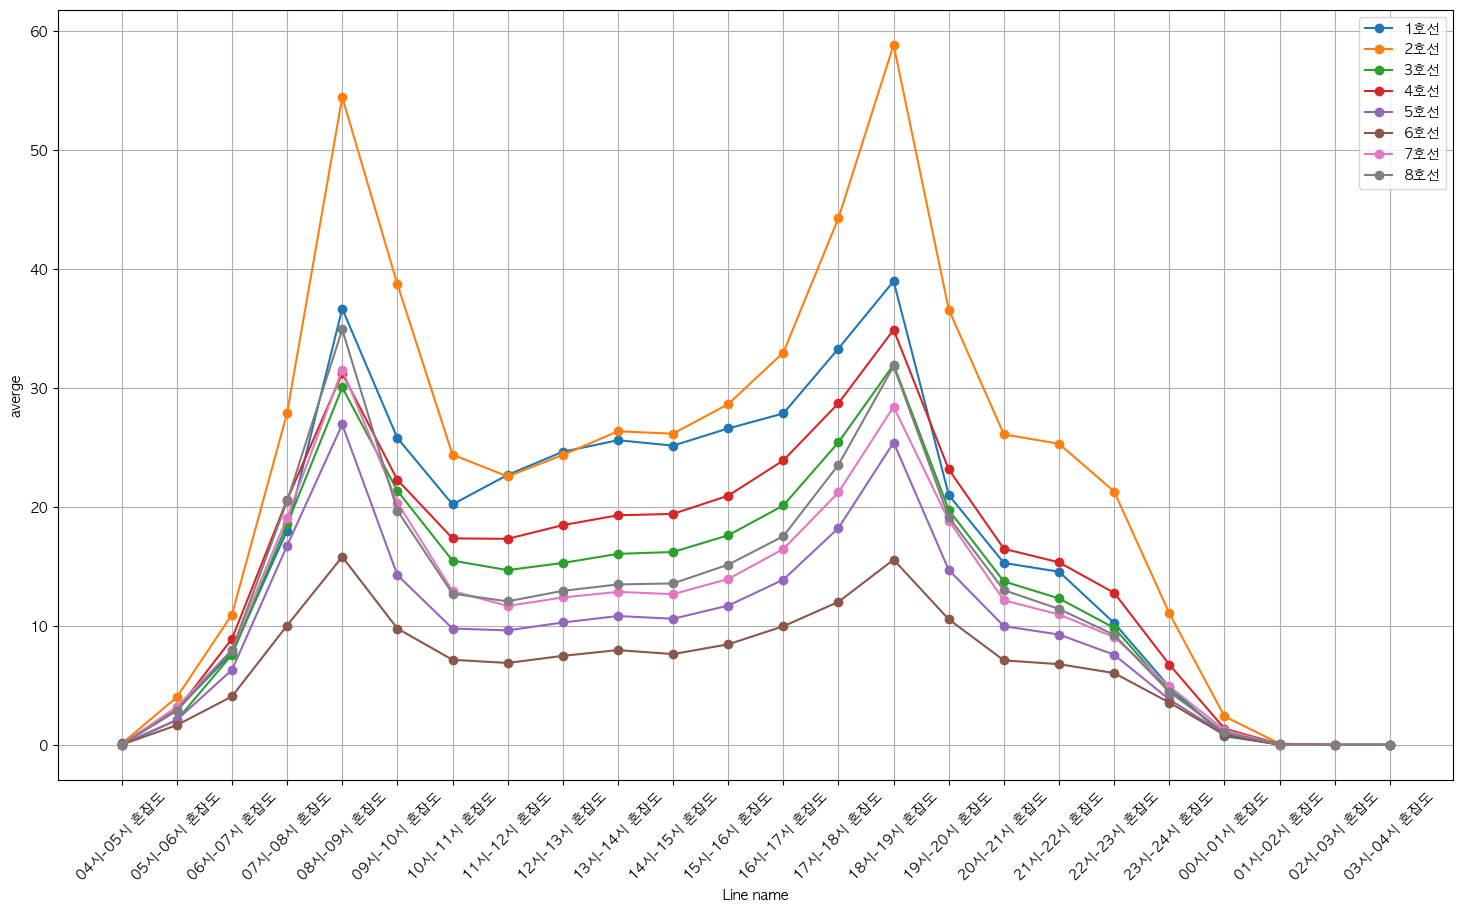

In [13]:
# 호선별 혼잡도 변화 line graph

plt.figure(figsize=(18,10))

for line in line_avg.index:
    plt.plot([col for col in line_avg.columns if '혼잡도' in col], line_avg.loc[line], marker='o', label=str(line))

plt.xlabel('Line name')
plt.ylabel('averge')
plt.xticks(rotation=45)
plt.grid()
plt.legend(loc='best')

plt.show()

- 전체적으로 체류인원과 동일한 패턴을 보임
- 역사의 면적에 따라 조금의 차이는 있으나, 승객이 몰리는 패턴은 동일 한 것으로 보임


In [15]:
# 노선별 시간대 평균 중 상위 10% 월만 

top_10 = line_avg[line_avg.max(axis=1) > line_avg.quantile(0.8).max()]
top_10


,04시-05시 혼잡도,05시-06시 혼잡도,06시-07시 혼잡도,07시-08시 혼잡도,08시-09시 혼잡도,09시-10시 혼잡도,10시-11시 혼잡도,11시-12시 혼잡도,12시-13시 혼잡도,13시-14시 혼잡도,...,18시-19시 혼잡도,19시-20시 혼잡도,20시-21시 혼잡도,21시-22시 혼잡도,22시-23시 혼잡도,23시-24시 혼잡도,00시-01시 혼잡도,01시-02시 혼잡도,02시-03시 혼잡도,03시-04시 혼잡도
line,,,,,,,,,,,,,,,,,,,,,
1호선,0.128444,2.938639,7.732389,18.02100,36.678944,25.798472,20.222750,22.703639,24.643333,25.617750,...,38.991194,21.008111,15.295944,14.559639,10.244528,4.883278,0.731583,0.027667,0.000583,0.000000
2호선,0.097500,4.005644,10.958889,27.90024,54.473516,38.731761,24.401913,22.573699,24.375530,26.368801,...,58.864867,36.607443,26.102670,25.322563,21.298346,11.062348,2.398207,0.104306,0.001812,0.000177


In [16]:
# 노선별 시간대 평균 중 하위 10% 월만 

bottom_10 = line_avg[line_avg.max(axis=1) < line_avg.quantile(0.2).max()]
bottom_10


,04시-05시 혼잡도,05시-06시 혼잡도,06시-07시 혼잡도,07시-08시 혼잡도,08시-09시 혼잡도,09시-10시 혼잡도,10시-11시 혼잡도,11시-12시 혼잡도,12시-13시 혼잡도,13시-14시 혼잡도,...,18시-19시 혼잡도,19시-20시 혼잡도,20시-21시 혼잡도,21시-22시 혼잡도,22시-23시 혼잡도,23시-24시 혼잡도,00시-01시 혼잡도,01시-02시 혼잡도,02시-03시 혼잡도,03시-04시 혼잡도
line,,,,,,,,,,,,,,,,,,,,,
5호선,0.009306,2.100561,6.302911,16.745956,26.944498,14.277473,9.781255,9.624370,10.290214,10.832885,...,25.425353,14.705433,9.980694,9.275107,7.578424,3.818323,0.918964,0.024183,0.000817,0.000027
6호선,0.016104,1.658105,4.070385,10.036631,15.815862,9.782685,7.151994,6.886325,7.484630,7.968162,...,15.572101,10.553846,7.104345,6.785791,6.035591,3.555185,0.838818,0.007286,0.000071,0.000000


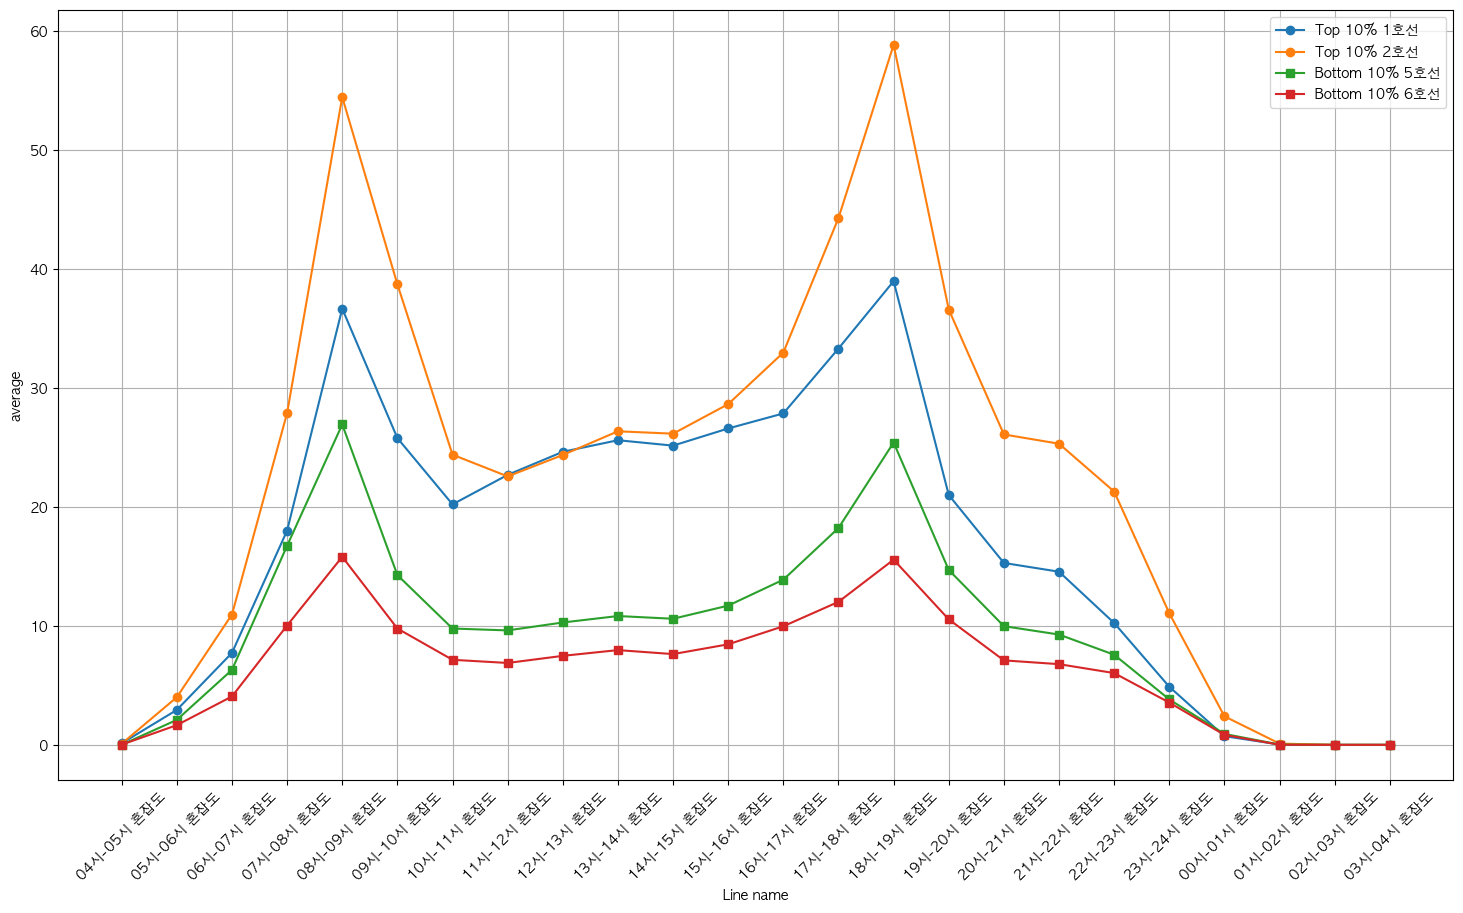

In [17]:
plt.figure(figsize=(18,10))

for line in top_10.index:
    plt.plot([col for col in top_10.columns if '혼잡도' in col], 
             top_10.loc[line], marker='o', label=f'Top 10% {line}')

for line in bottom_10.index:
    plt.plot([col for col in bottom_10.columns if '혼잡도' in col], 
             bottom_10.loc[line], marker='s', label=f'Bottom 10% {line}')


plt.xlabel('Line name')
plt.ylabel('average')
plt.xticks(rotation=45)
plt.grid()
plt.legend(loc='best')

plt.show()

In [13]:
df.head(1)

,사용월,호선명,지하철역,행정구역,대합실면적,승강장면적,월일수,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,...,18시-19시 체류인원,19시-20시 체류인원,20시-21시 체류인원,21시-22시 체류인원,22시-23시 체류인원,23시-24시 체류인원,00시-01시 체류인원,01시-02시 체류인원,02시-03시 체류인원,03시-04시 체류인원
0,202111,우이신설선,4.19민주묘지,강북구,NaN,NaN,30,2,0,1231,...,11217,9453,5773,4917,4159,2485,28,0,0,0
